<a href="https://www.kaggle.com/code/behnambaloochy/spaceship-titanic?scriptVersionId=143394315" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
import numpy as np
import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


# Data Preprocessing ----------------------------------------------------------------------------------
# df_train = pd.read_csv('train.csv', encoding='utf-8')
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', encoding='utf-8')

# print('train has {} rows and {} columns'.format(*df_train.shape))
# df_train.info()
# df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
# df_train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
# df_train = df_train.dropna(how="any")

# df_test = pd.read_csv('test.csv', encoding='utf-8')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', encoding='utf-8')

# df_test.info()
# print('test has {} rows and {} columns'.format(*df_test.shape))
# df_test["CryoSleep"] = df_test["CryoSleep"].fillna(df_test["CryoSleep"].mean())


# df_test = df_test.fillna(0)
# print(df_train.head(10))
# print(df_test.head(10))

df_train["Transported"] = df_train["Transported"].astype(int)
# y_train = df_train[['Transported']].values
y_train = df_train.iloc[:, 13].values

# df_train['VIP'] = df_train['VIP'].astype(int)
# df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
X_train = df_train.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values

# Categorical Feature Encoding**********
# print('HomePlanet values: ', df_test["HomePlanet"].unique())
# options_HomePlanet = {label: idx for idx, label in enumerate(np.unique(df_train['HomePlanet']))}
options_HomePlanet = {}
for i in range(0, df_train["HomePlanet"].unique().shape[0]):
    options_HomePlanet[df_train["HomePlanet"].unique()[i]] = i+1
# df_train["HomePlanet"] = df_train["HomePlanet"].map(options_HomePlanet)
j = 0
for i in X_train[:,0]:
    X_train[j,0] = options_HomePlanet.get(i)
    j += 1

# print('Train Cabin values: ', df_train[3].unique())
# print('Test Cabin values: ', df_test["Cabin"].unique())
options_Cabin = {}
for i in range(0, df_train["Cabin"].unique().shape[0]):
    options_Cabin[df_train["Cabin"].unique()[i]] = i+1
j = 0
for i in X_train[:,2]:
    X_train[j,2] = options_Cabin.get(i)
    j += 1

# print('Destination values: ', df_test["Destination"].unique())
options_Destination = {}
for i in range(0, df_train["Destination"].unique().shape[0]):
    options_Destination[df_train["Destination"].unique()[i]] = i+1
j = 0
for i in X_train[:,3]:
    X_train[j,3] = options_Destination.get(i)
    j += 1
# **********

X_train[:,1] = np.where(X_train[:,1] == 'True', 1, 0)
X_train[:,5] = np.where(X_train[:,5] == 'True', 1, 0)
X_train = np.float_(X_train)
# print('Class labels:', np.unique(y_train))
# imr = imr.fit(X_train)
# X_train = imr.transform(X_train)

# df_test['VIP'] = df_test['VIP'].astype(int)
# df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
X_test = df_test.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]].values

# Categorical Feature Encoding**********
j = 0
for i in X_test[:,0]:
    X_test[j,0] = options_HomePlanet.get(i)
    j += 1

j = 0
for i in X_test[:,2]:
    X_test[j,2] = options_Cabin.get(i)
    j += 1

j = 0
for i in X_test[:,3]:
    X_test[j,3] = options_Destination.get(i)
    j += 1
# **********

X_test[:,1] = np.where(X_test[:,1] == 'True', 1, 0)
X_test[:,5] = np.where(X_test[:,5] == 'True', 1, 0)
X_test = np.float_(X_test)

# imr = imr.fit(X_test)
# X_test = imr.transform(X_test)

# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train)

# Feature Scaling---------------------------------------------------------------------------------------
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

"""
# K-fold cross validation-------------------------------------------------------------------------------
s_i = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train_SI = s_i.fit_transform(X_train)
pca = PCA(n_components=10)
X_train_PCA = pca.fit_transform(X_train_SI)

hyperparameter_score_list = []
for n_est in range(1,51):
    rfc = RandomForestClassifier(n_estimators=n_est, random_state=1, n_jobs=2)
    scores = cross_validate(rfc, X_train_PCA, y_train, cv=10, scoring='accuracy')
    mean_score = np.mean(scores['test_score'])
    hyperparameter_score_list.append([n_est, mean_score])
print(hyperparameter_score_list)
"""

# Define Data Pipeline----------------------------------------------------------------------------------
pipe_rf = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean"), 
                        PCA(n_components=10), 
                        RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2))

# sklearn-Random Forest Training------------------------------------------------------------------------
# forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
# forest.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
# sklearn-Random Forest Prediction----------------------------------------------------------------------
y_pred = pipe_rf.predict(X_test)

# Submission--------------------------------------------------------------------------------------------
trans = []
for i in y_pred:
    trans.append(i==1)
submission = np.column_stack((df_test.PassengerId, trans))
print(submission)
print(np.shape(submission))
df_result = pd.DataFrame(submission)
df_result.to_csv("/kaggle/working/submission.csv", header=['PassengerId', 'Transported'], index=False)
# df_result.to_csv("submission.csv", header=['PassengerId', 'Transported'], index=False)
# feature_names = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'Shopping', 'Spa', 'VRDeck']


[['0013_01' True]
 ['0018_01' False]
 ['0019_01' True]
 ...
 ['9271_01' True]
 ['9273_01' True]
 ['9277_01' True]]
(4277, 2)


Learning Curve

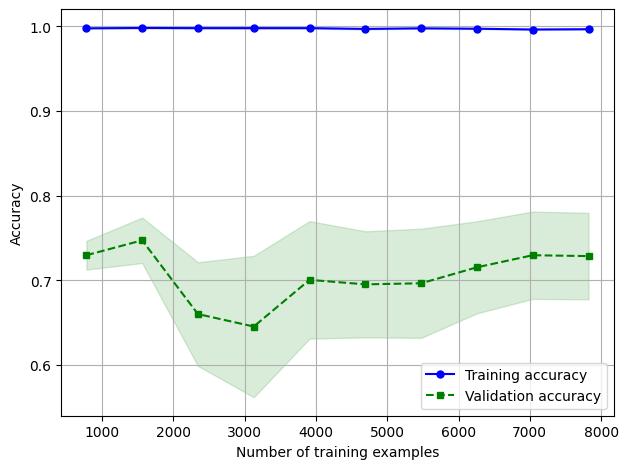

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_rf, X=X_train, y=y_train,
                                         train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.autoscale()
plt.show()

Validation Curve

In [7]:
pipe_rf.get_params(deep=True)

{'memory': None,
 'steps': [('simpleimputer', SimpleImputer()),
  ('pca', PCA(n_components=10)),
  ('randomforestclassifier',
   RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1))],
 'verbose': False,
 'simpleimputer': SimpleImputer(),
 'pca': PCA(n_components=10),
 'randomforestclassifier': RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1),
 'simpleimputer__add_indicator': False,
 'simpleimputer__copy': True,
 'simpleimputer__fill_value': None,
 'simpleimputer__keep_empty_features': False,
 'simpleimputer__missing_values': nan,
 'simpleimputer__strategy': 'mean',
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 10,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestcla

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [i for i in range(1, 40)]
train_scores, test_scores = validation_curve(
                            estimator=pipe_rf, 
                            X=X_train, 
                            y=y_train,
                            param_name='randomforestclassifier__n_estimators', 
                            param_range=param_range,
                            cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
# plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
# plt.ylim([0.6, 1.0])
# plt.xlim([0, 51])
plt.tight_layout()
plt.autoscale()
plt.show()

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipe_svc = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="mean") ,StandardScaler(), SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')